![HenryLogo](https://d31uz8lwfmyn8g.cloudfront.net/Assets/logo-henry-white-lg.png)

# **Proyecto integrador**

### 3. Modelamiento

Una vez preparados los datos, se procederá con el modelamiento. Recuerden que el objetivo es clasificar a un paciente como hospitalizado o no hospitalizado, teniendo en cuenta un data set que contiene información referente a antecedentes del paciente, morbilidad asociada al paciente y antecedentes relacionados con la toma de la biopsia y complicaciones infecciosas.




Carguen la base de datos preparada desde la fase 2.

In [45]:
import pandas as pd
import numpy as np

In [46]:
df = pd.read_csv("data_lista.csv")
print(df.shape)
df.head()

(565, 9)


,Edad,Diabetes,Hospitalizado_Ultimo_Mes,Concentracion_PSA,Biopsia_Previa,Volumen_Prostatico_Mayor_a_40,Cateter_Urinario,Enfermedad_cronica_pulmonar,Hospitalizado_Post_Proc
0,1.452828,0,0,0.749829,0,1,0,1,0
1,1.707237,0,0,5.021622,0,1,0,1,0
2,1.452828,0,0,0.494033,0,1,0,1,0
3,1.707237,0,0,5.418106,0,1,0,1,0
4,1.198420,0,0,-0.369279,0,1,0,1,0


Separen el dataset en X, y (variable objetivo)

In [47]:
X = df.drop('Hospitalizado_Post_Proc', axis=1) #'Edad', 'Diabetes', 'Hospitalizado_Ultimo_Mes', 'Concentracion_PSA','Biopsia_Previa', 'Volumen_Prostatico_Mayor_a_40', 'Cateter_Urinario','Enfermedad_cronica_pulmonar'
y = df['Hospitalizado_Post_Proc'] # 'Hospitalizado_Post_Proc'
# Denotamos X con mayúscula ya que incluye más de un atributo

In [48]:
X.head()

,Edad,Diabetes,Hospitalizado_Ultimo_Mes,Concentracion_PSA,Biopsia_Previa,Volumen_Prostatico_Mayor_a_40,Cateter_Urinario,Enfermedad_cronica_pulmonar
0,1.452828,0,0,0.749829,0,1,0,1
1,1.707237,0,0,5.021622,0,1,0,1
2,1.452828,0,0,0.494033,0,1,0,1
3,1.707237,0,0,5.418106,0,1,0,1
4,1.198420,0,0,-0.369279,0,1,0,1


In [49]:
print(y.unique())

[0 1]


Separen el dataset en X_train, X_test, y_train y y_test

> Ahora que definimos nuestras variables predictoras **X** y la etiqueta a predecir **y**, vamos a separar nuestros datos en entrenamiento y testeo. Utilizaremos el 20% del dataset para evaluar.

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
len(X_test)

113

Instancien, entrenen y predigan sobre un árbol de decisión asignando una profundidad máxima arbitraria

> Instanciamos el modelo de árbol de decisión

In [51]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth = 5, criterion='entropy') # con un límite de profundidad de 6

> Entrenamos

In [52]:
# Entrenamos el modelo. Para ello, usamos nuestro set de entrenamiento
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

> Predecimos

In [53]:
from sklearn.metrics import accuracy_score

# Aplicar el modelo entrenado sobre test y train
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

print('Accuracy train:', accuracy_score(y_train,y_pred_train))
print('Accuracy test:', accuracy_score(y_test,y_pred_test))

Accuracy train: 0.9756637168141593
Accuracy test: 0.9292035398230089


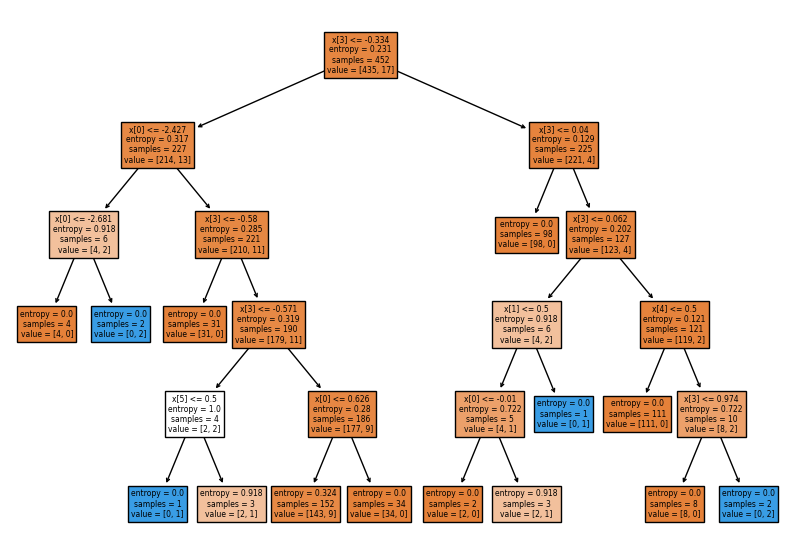

In [54]:
# visualicemos el árbol

from sklearn import tree
import matplotlib.pyplot as plt 

plt.figure(figsize = (10,7))
tree.plot_tree(clf, filled = True)
plt.show()

Realicen la matriz de confusión para este modelo. Se recomienda utilizar mapa de calor para la visualización. 

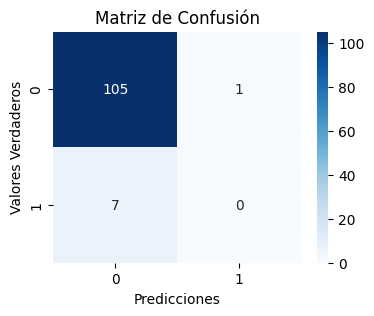

In [55]:
#Matriz de confusión de nuestro modelo
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

#matrix = confusion_matrix(y_train, y_pred_train)
matrix_2 = confusion_matrix(y_test, y_pred_test)

# Graficamos la matriz
plt.figure(figsize=(4, 3))
sns.heatmap(matrix_2, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.show()

In [ ]:
# El modelo parece predecir bien los No hospitalizados(0)

Seleccione tres métricas de evaluación para este modelo de clasificación y describa el significado de cada una de ellas para el modelo creado.

> PRECISIÓN

>Resultados correctos sobre el total de muestras seleccionadas (verdaderos positivos sobre los verdaderos positivos + los falsos positivos). Indica cuánto acertó el modelo dentro de todo el universo. 

In [56]:
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred_test, average='macro')
print(round(precision,2))

0.47


> Exhaustividad/Recall/Sensibilidad

> Resultados correctos por sobre todos los resultados que buscamos identificar (verdaderos positivos sobre los verdaderos positivos + falsos negativos)

In [57]:
from sklearn.metrics import recall_score

#precision = recall_score(y_test, y_test_pred, average= None)
recall = recall_score(y_test, y_pred_test, average='macro')
print(round(recall,2))

0.5


> F1-

> combina precisión y exhaustividad de forma tal de mantener una relación entre las dos (no aumenta mucho una en 
detrimento de la otra)

In [58]:
from sklearn.metrics import f1_score

f1_score = f1_score(y_test, y_pred_test, average= 'macro')
print(round(precision,2))

0.47


Realice un diagrama de la importancia de cada variable respecto a la clasificación de la variable objetivo

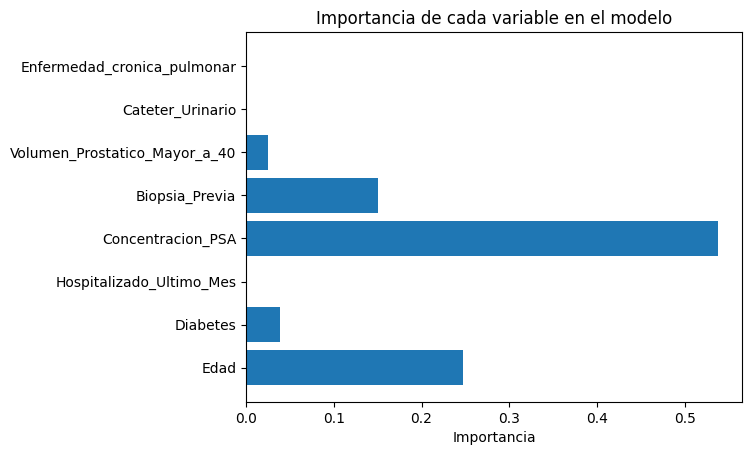

In [59]:
# Visualizamos la importancia de las variables

import matplotlib.pyplot as plt 
plt.barh(list(X_train.columns), clf.feature_importances_)
plt.xlabel('Importancia')
plt.title('Importancia de cada variable en el modelo')
plt.show()

Encuentre cuál sería un valor óptimo para el hiperparámetro **max_depth** para el árbol de decisión. Construya un modelo con este valor y compare las métricas de evaluación respecto al modelo creado con una profundidad arbitraria. 

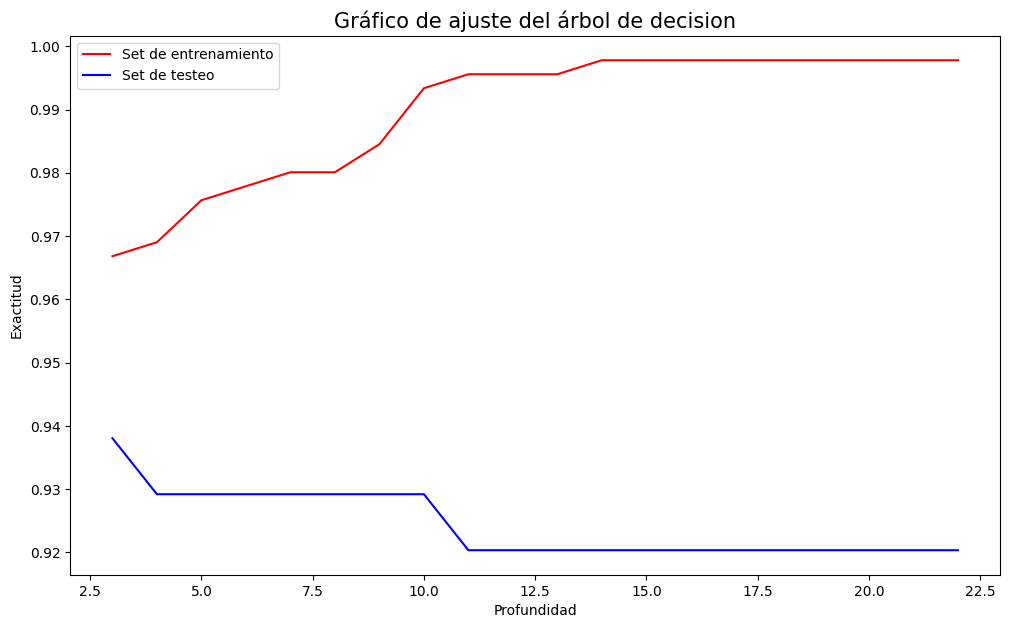

In [60]:
train_prec =  []
eval_prec = []
max_deep_list = list(range(3, 23))

for deep in max_deep_list:
    clf_opt = DecisionTreeClassifier(max_depth=deep, criterion='entropy')
    clf_opt.fit(X_train, y_train)
    train_prec.append(clf_opt.score(X_train, y_train))
    eval_prec.append(clf_opt.score(X_test, y_test))

plt.figure(figsize=(12,7))
plt.plot(max_deep_list, train_prec, color='r', label='Set de entrenamiento')
plt.plot(max_deep_list, eval_prec, color='b', label='Set de testeo')
plt.title('Gráfico de ajuste del árbol de decision', fontsize = 15)
plt.legend()
plt.ylabel('Exactitud')
plt.xlabel('Profundidad')
plt.show()

In [ ]:
# Con un valor de 3 profundidad del árbol la precisión en el conjunto de test deja de mejorar y empieza a disminuir

Instancien, entrenen y predigan sobre un modelo de k-vecinos asignando una cantidad de vecinos k-aribitraria. 

In [68]:
# importamos la clase que contiene el algoritmo
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123, test_size= 0.2)

# instanciamos el modelo y lo entrenamos
clf = KNeighborsClassifier(n_neighbors=10)  # Le asignamos una cantidad de 10 vecinos

# lo entrenamos
clf.fit(X_train,y_train)

# hacemos la predicción
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

# evaluamos
print('Accuracy train:', round(accuracy_score(y_train, y_pred_train),4)*100)
print('Accuracy test:', round(accuracy_score(y_test, y_pred_test),4)*100)

Accuracy train: 96.02000000000001
Accuracy test: 94.69


Encuentre el valor óptimo para k

In [69]:
# Utilizaremos la estrategia grid_search para optimizar parámetros.

# Creamos la grilla de hiperparámetros para el modelo de vecinos más cercanos
import numpy as np

param_grid = {'n_neighbors':np.arange(1, 20)}

In [70]:
# Instanciamos el modelo KNN
knn = KNeighborsClassifier()

In [71]:
# Probamos la estrategia grid search
from sklearn.model_selection import GridSearchCV 

# Le pasamos la grilla que creamos
model = GridSearchCV(knn, param_grid=param_grid, cv=5)

# Entrenamos
model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [73]:
print("Mejores hiperparámetros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

scores = pd.DataFrame(model.cv_results_)

Mejores hiperparámetros: {'n_neighbors': 1}
Mejor Score: 0.9602197802197802



In [74]:
#Predecimos en los datos de test con el mejor modelo obtenido
prediction = model.predict(X_test)

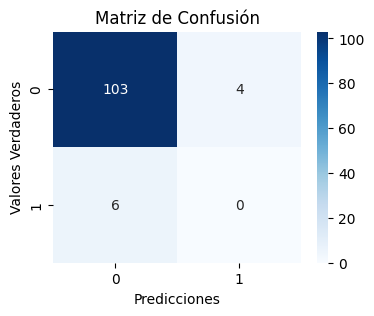

In [77]:
#Matriz de confusión
import seaborn as sns
from sklearn.metrics import confusion_matrix

matrix_2 = confusion_matrix(y_test, prediction)

# Graficamos la matriz
plt.figure(figsize=(4, 3))
sns.heatmap(matrix_2, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.show()

Halle las mismas tres métricas de evaluación para este modelo de clasificación y compare los valores para el performance, respecto al árbol de decisión cuyo hiperparámetro **max_depth** se optimizó. ¿Qué puede concluir? 

In [76]:
# PRECISIÓN
from sklearn.metrics import precision_score

precision = precision_score(y_test, prediction, average='macro')
print(round(precision,2))

# RECALL
from sklearn.metrics import recall_score

#precision = recall_score(y_test, y_test_pred, average= None)
recall = recall_score(y_test, prediction, average='macro')
print(round(recall,2))

#F1-SCORE
from sklearn.metrics import f1_score

f1_score = f1_score(y_test, prediction, average= 'macro')
print(round(precision,2))

0.47
0.48
0.47


De acuerdo con lo aprendido en el módulo, ¿Cómo cree que se puede mejorar el performance de este modelo? 

In [ ]:
# S epuede mejorar haciendo un resampleo de los valores de la variable de respuesta, ya que como se vio en el notebook anterior 
# +95% de los valores eran NO. 